# Assessment Problems

In [ ]:
#Import the different modules needed
import math
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt


## Extending the Lady Tasting Tea

In [26]:
#Number of cups of tea in total 
no_cups = 12

#Number of cups of tea with milk first
no_cups_milk_first = 4

#Number of cups of tea after

no_cups_tea_first = 8



In [50]:
# Number of ways to choose which cups are milk-first (combinations: order doesn't matter)  
# more info about math.comb https://docs.python.org/3/library/math.html#math.comb

# Calculate the number of ways to choose milk-first cups from all cups
ways = math.comb(no_cups, no_cups_milk_first)

#Show
ways

495

In [ ]:
# Adding labels for the cups 

labels = list(range(no_cups))

labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
#Show the different ways of selecting No_cupos_milk_+first out of no_cups of tea
#https://docs.python.org/3/library/itertools.html#itertools.combinations
combs = list(itertools.combinations(labels, no_cups_milk_first))

#Show
combs


[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [51]:
# Randomly select 4 cups to be milk-first (shuffling the 12 cups)

labels_milk = random.sample(labels,4)

#Sort the selected labels to improve readability 
labels_milk.sort()

labels_milk

[0, 1, 2, 3]

In [52]:
# Turn labels_milk into a set
set(labels_milk)

{0, 1, 2, 3}

In [53]:
# List to store number of overlaps for each combination
no_overlaps = []

# Loop through all possible combinations of milk-first cups
for comb in combs:
    # Convert combination to set
    s1 = set(comb)
    # Convert actual milk-first cups to set
    s2 = set(labels_milk)
    # Find overlap (correctly guessed cups)
    overlap = s1.intersection(s2)
    # Show combination, overlap, and number of correct guesses
    print(comb, len(overlap), overlap)
    # Append number of correct guesses to list
    no_overlaps.append(len(overlap))



(0, 1, 2, 3) 4 {0, 1, 2, 3}
(0, 1, 2, 4) 3 {0, 1, 2}
(0, 1, 2, 5) 3 {0, 1, 2}
(0, 1, 2, 6) 3 {0, 1, 2}
(0, 1, 2, 7) 3 {0, 1, 2}
(0, 1, 2, 8) 3 {0, 1, 2}
(0, 1, 2, 9) 3 {0, 1, 2}
(0, 1, 2, 10) 3 {0, 1, 2}
(0, 1, 2, 11) 3 {0, 1, 2}
(0, 1, 3, 4) 3 {0, 1, 3}
(0, 1, 3, 5) 3 {0, 1, 3}
(0, 1, 3, 6) 3 {0, 1, 3}
(0, 1, 3, 7) 3 {0, 1, 3}
(0, 1, 3, 8) 3 {0, 1, 3}
(0, 1, 3, 9) 3 {0, 1, 3}
(0, 1, 3, 10) 3 {0, 1, 3}
(0, 1, 3, 11) 3 {0, 1, 3}
(0, 1, 4, 5) 2 {0, 1}
(0, 1, 4, 6) 2 {0, 1}
(0, 1, 4, 7) 2 {0, 1}
(0, 1, 4, 8) 2 {0, 1}
(0, 1, 4, 9) 2 {0, 1}
(0, 1, 4, 10) 2 {0, 1}
(0, 1, 4, 11) 2 {0, 1}
(0, 1, 5, 6) 2 {0, 1}
(0, 1, 5, 7) 2 {0, 1}
(0, 1, 5, 8) 2 {0, 1}
(0, 1, 5, 9) 2 {0, 1}
(0, 1, 5, 10) 2 {0, 1}
(0, 1, 5, 11) 2 {0, 1}
(0, 1, 6, 7) 2 {0, 1}
(0, 1, 6, 8) 2 {0, 1}
(0, 1, 6, 9) 2 {0, 1}
(0, 1, 6, 10) 2 {0, 1}
(0, 1, 6, 11) 2 {0, 1}
(0, 1, 7, 8) 2 {0, 1}
(0, 1, 7, 9) 2 {0, 1}
(0, 1, 7, 10) 2 {0, 1}
(0, 1, 7, 11) 2 {0, 1}
(0, 1, 8, 9) 2 {0, 1}
(0, 1, 8, 10) 2 {0, 1}
(0, 1, 8, 11) 2 {0, 1}
(0, 1, 9

In [54]:
#Count the number of times each overlap occurs
counts = np.unique(no_overlaps, return_counts= True)

counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

<BarContainer object of 5 artists>

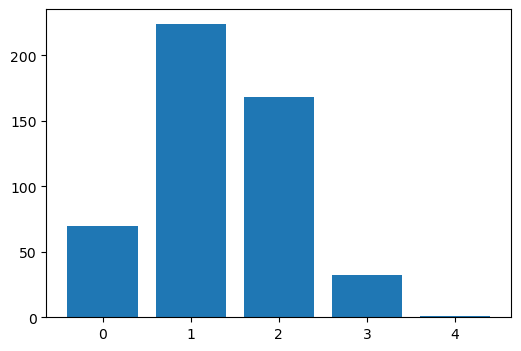

In [55]:
#Create figure

fig,ax = plt.subplots(figsize=(6,4))

ax.bar(counts[0], counts[1])

#### the null Hypothesis 

-   The lady has no specioal power to tell the difference between cups of tea with mil in first and cups of tea with tea in first
-   The lady is selectinf the cups from eight cups random 

#### Alternative hypothesis

-   The lady can tell the difference 

### Evidence
Fisher if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in 1 in 495. So it is unlikely 

In [48]:
# Probability that she random select four correct cups
#Probability decrease vS 8 cups experiment

# Probabilities for 12-cup experiment
prob_12 = [70/495, 224/495, 168/495, 32/495, 1/495]

# Probabilities for 8-cup experiment
prob_8 = [1/70, 16/70, 36/70, 16/70, 1/70]

# Print comparison
for r in range(5):
    print(f"{r} correct cups:", prob_12[r], "vs", prob_8[r])



0 correct cups: 0.1414141414141414 vs 0.014285714285714285
1 correct cups: 0.45252525252525255 vs 0.22857142857142856
2 correct cups: 0.3393939393939394 vs 0.5142857142857142
3 correct cups: 0.06464646464646465 vs 0.22857142857142856
4 correct cups: 0.00202020202020202 vs 0.014285714285714285


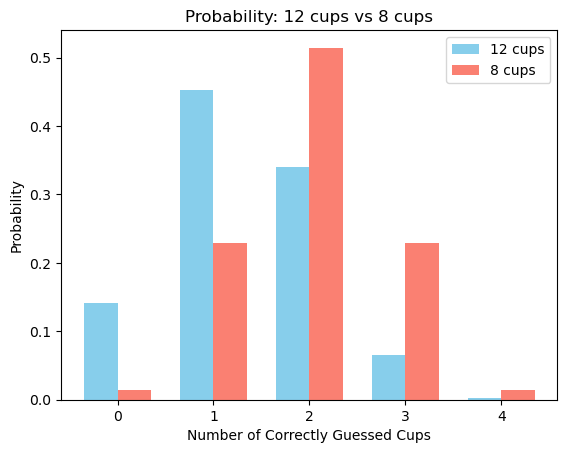

In [49]:
# Probabilities
prob_12 = [70/495, 224/495, 168/495, 32/495, 1/495]
prob_8 = [1/70, 16/70, 36/70, 16/70, 1/70]

# X-axis labels
labels = [0, 1, 2, 3, 4]
x = np.arange(len(labels))
width = 0.35

# Plot bars
plt.bar(x - width/2, prob_12, width, label='12 cups', color='skyblue')
plt.bar(x + width/2, prob_8, width, label='8 cups', color='salmon')

# Labels and legend
plt.xlabel('Number of Correctly Guessed Cups')
plt.ylabel('Probability')
plt.title('Probability: 12 cups vs 8 cups')
plt.xticks(x, labels)
plt.legend()

plt.show()
